# Generate 1D-2D contacts

This is a basic introduction for generating contacts with meshkernel

In [1]:
from meshkernel import MakeGridParameters, Mesh1d, Mesh2d, MeshKernel, GeometryList
from meshkernel.version import __version__

__version__

'7.0.4'

Other imports

In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
def plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0=None):
    fig, ax = plt.subplots()
    mesh1d_output_0.plot_edges(ax, color="blue")
    mesh2d_output_0.plot_edges(ax, color="black")
    if contacts_output_0:
        contacts_output_0.plot_edges(ax, mesh1d_output_0, mesh2d_output_0, color="red")
    ax.plot(
        mesh1d_output_0.node_x, mesh1d_output_0.node_y, "o", color="blue", markersize=5
    )
    plt.show()

# Set mesh2d and mesh 1d

In [4]:
# create base grid
mk = MeshKernel()

make_grid_parameters = MakeGridParameters(
    angle=0,
    origin_x=0.0,
    origin_y=0.0,
    upper_right_x=100.0,
    upper_right_y=100.0,
    block_size_x=10.0,
    block_size_y=10.0,
)

mk.curvilinear_compute_rectangular_grid_on_extension(make_grid_parameters)
mk.curvilinear_convert_to_mesh2d()

mesh1d_node_x = [0.0, 50.0, 100.0]
mesh1d_node_y = [20.0, 20.0, 20.0]
mesh1d_edge_nodes = [0, 1, 1, 2]
mesh1d = Mesh1d(
    node_x=mesh1d_node_x, node_y=mesh1d_node_y, edge_nodes=mesh1d_edge_nodes
)
mk.mesh1d_set(mesh1d)

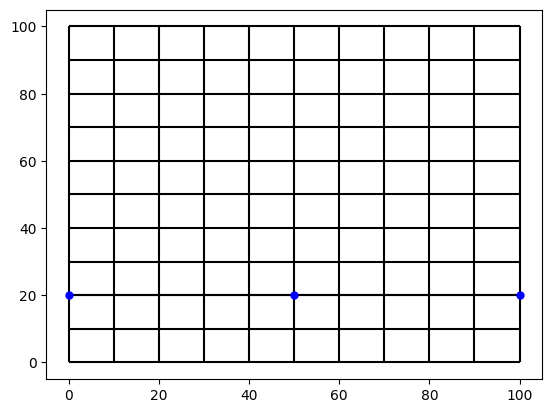

In [5]:
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()
plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0)

## Compute contacts

In [6]:
node_mask = np.full(mesh1d.node_x.size, True)

#### Compute multiple contacts

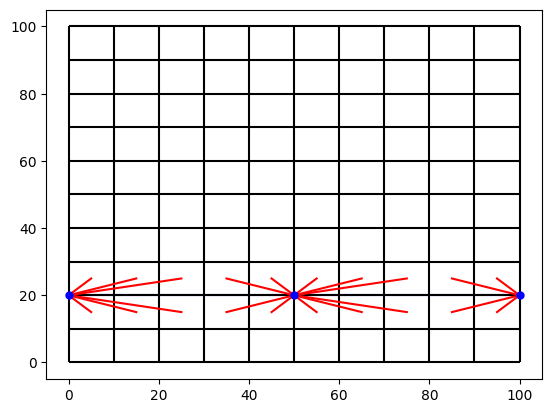

In [7]:
mk.contacts_compute_multiple(node_mask)
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()
plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0)

#### Compute single contacts

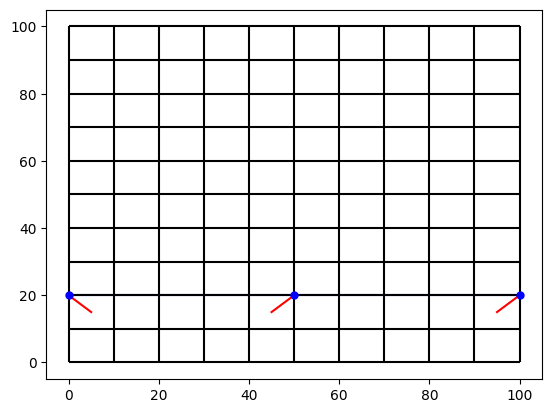

In [8]:
x_coordinates = np.array([0.0, 100.0, 100.0, 0.0, 0.0], dtype=np.double)
y_coordinates = np.array([0.0, 0.0, 100.0, 100.0, 0.0], dtype=np.double)
area_selection = GeometryList(x_coordinates, y_coordinates)
mk.contacts_compute_single(node_mask, area_selection, projection_factor=0.0)
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()
plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0)

#### Contacts compute with points

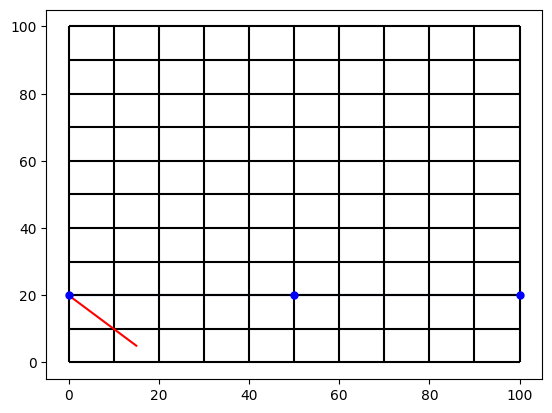

In [9]:
x_coordinates = np.array([10.000001], dtype=np.double)
y_coordinates = np.array([5.0], dtype=np.double)
point_cloud = GeometryList(x_coordinates, y_coordinates)

mk.contacts_compute_with_points(node_mask, point_cloud)
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()
plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0)

### Compute boundary

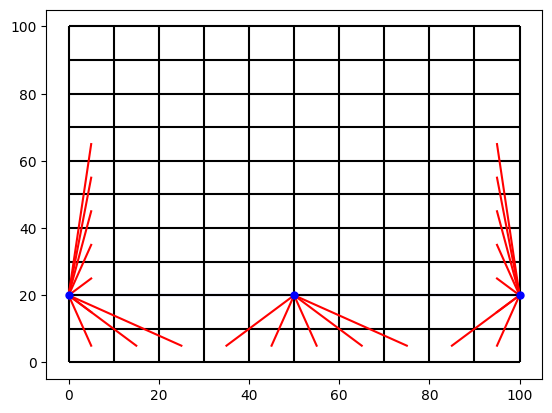

In [10]:
mk.contacts_compute_boundary(node_mask, search_radius=50.0)
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()
plot_mesh_and_contacts(mesh1d_output_0, mesh2d_output_0, contacts_output_0)